# Goal

1. Buatlah plot dari 7 film paling populer di tahun 2019.
2. Dukung plot dengan analisa
3. Code + penjelasannya
4. Kumpul di github:
    - requirement.txt (nama bebas)
    - python notebook
    - app.py
    - folder template berisi index.html
    - README.md (optional untuk update isinya)

---

# Scrapping & pembentukkan DataFrame

## Import bbrp library

In [175]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt

## Tarik data dr imdb

In [176]:
# tarik data imdb

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')
soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

In [177]:
# cek sudah bisa ambil 50 film di page pertama belum

lister = soup.find_all('div', attrs={'class':'lister-item-content'})
print(type(lister))
print(len(lister))

<class 'bs4.element.ResultSet'>
50


In [178]:
# untuk ambil urutan popularitas
# <h3><span>1.</span></h3> tag2 dipisah pake titik

urutan = lister[1].h3.span.text
urutan

'2.'

In [179]:
# untuk ambil judul film

judul = lister[1].h3.a.text
judul

'The Mandalorian'

In [180]:
# ambil rating imdb

rating = float(lister[1].strong.text)
rating

8.7

In [181]:
# ambil metascore
# diapit attribut class ratings-metascore tapi kalau non ga ketarik jadi mending di nol in

metascore = lister[1].find('div', attrs={'class':'ratings-metascore'})
type(metascore)

NoneType

In [182]:
# diapit attribut class ratings-metascore krn ada isinya bisa di span text

metascore = lister[0].find('div', attrs={'class':'ratings-metascore'}).span.text
metascore

'53        '

In [183]:
# ambil jumlah votes
# biar ga ambil value yg pake koma, ambil dari data-value aja

votes = int(lister[1].find('span', attrs={'name':'nv'})['data-value'])
votes

167404

## Coba compile semua hasil scrap

In [184]:
lister = soup.find_all('div', attrs={'class':'lister-item-content'})

# buat cangkang
popno = []
titles = []
imdb_ratings = []
metascores = []
votes = []

# ambil data per movie
for onelist in lister:
    
# berpatok ke metascore
# kalau metascore ga none berarti isi masing2 kolom seperti apa?
    if onelist.find('div', class_ = 'inline-block ratings-metascore') is not None:
        
        # urutan
        urut = onelist.h3.span.text
        urut = urut.strip()
        popno.append(urut)
        
        # judul
        title = onelist.h3.a.text
        title = title.strip()
        titles.append(title)
        
        # imdb rating
        ratings = float(onelist.strong.text)
        imdb_ratings.append(ratings)
        
        # metascore
        mscore = onelist.find('div', attrs={'class':'inline-block ratings-metascore'}).span.text
        mscore = int(mscore)/10
        metascores.append(float(mscore))
        # dibagi 10 biar bandingin ke imdb rating lebih enak
        
        # votes
        vote = onelist.find('span', attrs={'name':'nv'})['data-value']
        votes.append(int(vote))

# kalau metascore none berarti isi masing2 kolom seperti apa?
    if onelist.find('div', class_ = 'inline-block ratings-metascore') is None:
        
        # urutan
        urut = onelist.h3.span.text
        urut = urut.strip()
        popno.append(urut)
        
        # judul
        title = onelist.h3.a.text
        title = title.strip()
        titles.append(title)
        
        # imdb rating
        ratings = float(onelist.strong.text)
        imdb_ratings.append(ratings)
        
        # metascore
        mscore = 0.0
        metascores.append(float(mscore))
        # karena none type dan biar datanya bisa ketarik juga, di nol in aja
        
        # votes
        vote = onelist.find('span', attrs={'name':'nv'})['data-value']
        votes.append(int(vote))
        
# dari cangkang yang dah dibuat disusun jadi df
df = pd.DataFrame({
'popularity_order': popno,
'film_title': titles,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})

print(df.info()) #cek data type
print() #line break
print(df[df['metascore']==0].count()) #jumlah metascore yg none harusnya sama dgn code dibawah2 (cek metascore yang none)
print()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity_order  50 non-null     object 
 1   film_title        50 non-null     object 
 2   imdb              50 non-null     float64
 3   metascore         50 non-null     float64
 4   votes             50 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB
None

popularity_order    17
film_title          17
imdb                17
metascore           17
votes               17
dtype: int64



,popularity_order,film_title,imdb,metascore,votes
0,1.,Star Wars: Episode IX - The Rise of Skywalker,6.7,5.3,319893
1,2.,The Mandalorian,8.7,0.0,167404
2,3.,After Life,8.5,0.0,67411
3,4.,Dead to Me,8.1,0.0,37582
4,5.,Once Upon a Time... in Hollywood,7.7,8.3,463017
5,6.,The Gentlemen,7.9,5.1,130837
6,7.,Gisaengchung,8.6,9.6,402890
7,8.,Bad Education,7.2,7.9,12511
8,9.,The Lodge,6.1,6.4,12327
9,10.,El hoyo,7.0,7.3,118351


In [185]:
# buat tabel

df['popularity_order'] = df['popularity_order'].replace('[\.]','',regex=True).astype('int64')
df['film_title'] = df['film_title'].replace('Gisaengchung','Parasite')
df = df.sort_values('popularity_order', ascending=True).set_index('popularity_order')
df

,film_title,imdb,metascore,votes
popularity_order,,,,
1,Star Wars: Episode IX - The Rise of Skywalker,6.7,5.3,319893
2,The Mandalorian,8.7,0.0,167404
3,After Life,8.5,0.0,67411
4,Dead to Me,8.1,0.0,37582
5,Once Upon a Time... in Hollywood,7.7,8.3,463017
6,The Gentlemen,7.9,5.1,130837
7,Parasite,8.6,9.6,402890
8,Bad Education,7.2,7.9,12511
9,The Lodge,6.1,6.4,12327


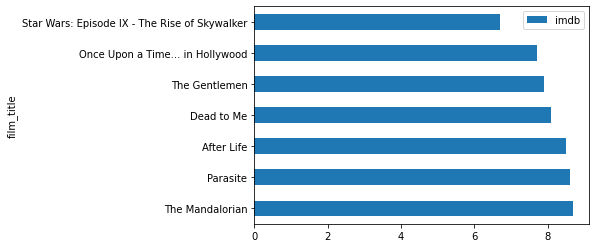

In [186]:
# buat plot

df.head(7).sort_values('imdb',ascending=False).set_index('film_title').\
    drop(columns=['metascore','votes']).\
    plot(kind='barh', width=0.5, align='center')

In [187]:
# cek metascore yang none

popno = []
titles = []
imdb_ratings = []
metascores = []
votes = []

# ambil data per movie
for onelist in lister:

    if onelist.find('div', class_ = 'inline-block ratings-metascore') is None:
        
       # urutan
        urut = onelist.h3.span.text
        urut = urut.strip()
        popno.append(urut)
        
        # judul
        title = onelist.h3.a.text
        title = title.strip()
        titles.append(title)
        
        # imdb rating
        ratings = float(onelist.strong.text)
        imdb_ratings.append(ratings)
        
        # metascore
        mscore = 0
        metascores.append(int(mscore))
        
        # votes
        vote = onelist.find('span', attrs={'name':'nv'})['data-value']
        votes.append(int(vote))
        
df = pd.DataFrame({
'popularity_order': popno,
'film_title': titles,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})

print(df.info()) #cek data type
print()
print(df[df['metascore']==0].count()) #buat cek jumlah film dgn metascore kosong berapa banyak
print()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity_order  17 non-null     object 
 1   film_title        17 non-null     object 
 2   imdb              17 non-null     float64
 3   metascore         17 non-null     int64  
 4   votes             17 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 808.0+ bytes
None

popularity_order    17
film_title          17
imdb                17
metascore           17
votes               17
dtype: int64



,popularity_order,film_title,imdb,metascore,votes
0,2.,The Mandalorian,8.7,0,167404
1,3.,After Life,8.5,0,67411
2,4.,Dead to Me,8.1,0,37582
3,15.,Reckoning,6.5,0,580
4,16.,What We Do in the Shadows,8.4,0,22485
5,17.,The Witcher,8.3,0,252666
6,19.,Chernobyl,9.4,0,460650
7,20.,The Boys,8.7,0,143875
8,24.,NOS4A2,6.7,0,5439
9,26.,Sex Education,8.3,0,131867


---

# Analisa

Selama ini saya selalu berpikir film paling populer pasti memiliki rating yg tinggi. Tapi ternyata tidak begitu...ada yg rating imdb nya <7 bahkan beberapa ada yang memiliki metascore <6 (contoh: <i>Star Wars Skywalker</i> dan <i>The Gentlemen</i>) tapi tingkat popularitas tinggi.

Metascore sendiri dianggap sebagai rating dari movie yang diberikan oleh kelompok kritikus film dunia dan opini mereka dibentuk dalam rupa weighted average score. Tentunya semakin tinggi metascore dan imdb rating nya pasti movie tersebut semakin menarik untuk ditonton. Untuk pengertian lebih mendalam ttg metascore bisa merefer ke __[link ini](https://www.imdb.com/list/ls051211184/)__.

Lalu, apakah makin banyak yg nge-vote maka makin populer filmnya?\
Ternyata jumlah voters pun ga menjamin tingkat popularitas, movies seperti <i>The Gentlemen</i> yang jumlah voters kurang lebih 100.000 jika dibandingkan dengan <i>Parasite</i> yg jumlahnya 400.000 an (4x nya) dikatakan populer.

Pertanyaan besar yg muncul ttg popularitas di tahun 2019 mungkin ini:\
<b>Bagaimana dengan Avengers: Endgame? Mengapa tidak termasuk ke top 7 di list?</b>\
Avengers: Endgame masih termasuk top 20 menurut tingkat popularitas imdb dengan:
 - imdb rating = 8.4
 - metascore = 78
 - voters = 715.225

Hmm...beda banget kan sama movie2 yg ada di list top 7...jadi apa cara yg dipakai imdb untuk memeringkat popularitas?

Dari hasil pencarian di google, saya menemukan seseorang yg telah lama berkecimpung dengan imdb. Teman2 bisa merefer ke __[link ini](https://www.quora.com/What-does-popularity-on-IMDB-mean)__ untuk melihat lebih detil tentang popularitas film di imdb berdasarkan keterangan orang tersebut. Singkatnya nih...film di imdb itu makin populer kalau makin banyak yang klik link di title nya. Jadi dalam case capstone ini, Star Wars Skywalker di peringkat pertama di antara movie2 & film2 lainnya karena title "Star Wars: ... Skywalker" nya banyak yg ngeklik. 

Sayangnya karena ilmu saya belum banyak, saya belum bisa kumpulin data berapa banyak title nya itu diklik untuk memastikan bener ga si keterangan yang saya baca...\
Tapi...dengan adanya tabel dan plot yang tersaji sebagai hasil capstone yg telah dibuat, teman2 bisa notice kejanggalan2 yang muncul dari tingkat popularitas yang dibuat sama imdb. Secara simple dari 7 film/movie tersebut bisa terlihat perbedaan peringkatnya kalau kita lihat dari sisi <i><b>peringkat popularitas</b></i> nya (bisa refer ke tabel dibawah ini atau tabel di hasil capstone) dan <i><b>peringkat imdb rating</b></i> nya (bisa refer ke plot nya). Dengan notice adanya kejanggalan tsb kita jadi berpikir lebih jauh, "kenapa bisa gitu ya peringkatnya?"

Sekian analisis saya, semoga membantu teman2 untuk sama2 merenung dan sama2 belajar lebih dalam lg ttg data analisis :D

cheers!

<b>dataframe/table:</b>\
![](assets/dataframe.png)

<b>plot result:</b>\
![](assets/plot.png)

---

# Draft app.py (Flask)

In [27]:
# import library
from flask import Flask, render_template 
import pandas as pd
import requests
from bs4 import BeautifulSoup 
from io import BytesIO
import base64
import matplotlib.pyplot as plt

app = Flask(__name__)

def scrap(url):
    # This is function for scrapping
    url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')
    soup = BeautifulSoup(url_get.content,"html.parser")
    lister = soup.find_all('div', attrs={'class':'lister-item-content'})
    
    # Find the key to get the information
    # buat cangkang
    popno = []
    titles = []
    imdb_ratings = []
    metascores = []
    votes = []

    # ambil data per movie
    for onelist in lister:
    
        # berpatok ke metascore
        # kalau metascore ga none berarti isi masing2 kolom seperti apa?
        if onelist.find('div', class_ = 'inline-block ratings-metascore') is not None:
        
            # urutan
            urut = onelist.h3.span.text
            urut = urut.strip()
            popno.append(urut)
        
            # judul
            title = onelist.h3.a.text
            title = title.strip()
            titles.append(title)
        
            # imdb rating
            ratings = float(onelist.strong.text)
            imdb_ratings.append(ratings)
        
            # metascore dibagi 10 biar bandingin ke imdb rating lebih enak
            mscore = onelist.find('div', attrs={'class':'inline-block ratings-metascore'}).span.text
            mscore = int(mscore)/10
            metascores.append(float(mscore))
                    
            # votes, ambil data value langsung biar ga usa repot ilangin koma
            vote = onelist.find('span', attrs={'name':'nv'})['data-value']
            votes.append(int(vote))

        # kalau metascore none berarti isi masing2 kolom seperti apa?
        if onelist.find('div', class_ = 'inline-block ratings-metascore') is None:
        
            # urutan
            urut = onelist.h3.span.text
            urut = urut.strip()
            popno.append(urut)
        
            # judul
            title = onelist.h3.a.text
            title = title.strip()
            titles.append(title)
        
            # imdb rating
            ratings = float(onelist.strong.text)
            imdb_ratings.append(ratings)
        
            # metascore karena none type dan biar datanya bisa ketarik juga, di nol in aja
            mscore = 0.0
            metascores.append(float(mscore))
                    
            # votes
            vote = onelist.find('span', attrs={'name':'nv'})['data-value']
            votes.append(int(vote))
        
    # dari cangkang yang dah dibuat disusun jadi df
    df = pd.DataFrame({
    'popularity_order': popno,
    'film_title': titles,
    'imdb': imdb_ratings,
    'metascore': metascores,
    'votes': votes
    })
    
    # ilangin titik di peringkat popularitas
    df['popularity_order'] = df['popularity_order'].replace('[\.]','',regex=True).astype('int64')
    
    # pas saya tarik masi nama korea jadi biar sesuai tampilan imdb di replace aja
    df['film_title'] = df['film_title'].replace('Gisaengchung','Parasite')
    
    # disortir ulang biar keurut sm tampilan imdb
    df = df.sort_values('popularity_order', ascending=True).set_index('popularity_order')

    return df

@app.route("/")
def index():
    df = scrap('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31') #insert url here

    # This part for rendering matplotlib
    fig = plt.figure(figsize=(5,2),dpi=300)
    
    # plot yg mau dishow cuma top 7 tingkat popularitas
    # untuk keperluan analisa sort value nya pakai imdb rating
    df.head(7).sort_values('imdb',ascending=False).set_index('film_title').\
    drop(columns=['metascore','votes']).\
    plot(kind='barh', width=0.5, align='center')
    
    # Do not change this part
    plt.savefig('plot1',bbox_inches="tight") 
    figfile = BytesIO()
    plt.savefig(figfile, format='png')
    figfile.seek(0)
    figdata_png = base64.b64encode(figfile.getvalue())
    result = str(figdata_png)[2:-1]
    # This part for rendering matplotlib

    # this is for rendering the table
    df = df.to_html(classes=["table table-bordered table-striped table-dark table-condensed"])

    # biar tampilan kesusun sesuai template dipanggil index_copy1 dari folder template
    return render_template("index_copy1.html", table=df, result=result)    
    
if __name__ == "__main__": 
    app.run(debug=True) # biar error log kelihatan

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with stat


SystemExit: 1

C:\Users\Margareth Devina\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


---